**IMPORTING LIBRARIES AND DATASET**

In [ ]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyt
import seaborn as sns
from sklearn.metrics import accuracy_score
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix
from collections import Counter

In [ ]:
#Reading dataset
df = pd.read_csv("./Fake.csv")
df1 = pd.read_csv("./True.csv")

###**DATA ANALYSIS**

In [ ]:
# displays first few rows of dataset
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#dropping column from dataframe
df = df.drop("subject",axis = 1)
df1 = df1.drop("subject", axis = 1)

In [ ]:
#inserting new column into dataframe
df["class"] = 0
df1["class"] = 1

In [ ]:
df.head()

,title,text,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",0


In [ ]:
df1.head()

,title,text,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


In [ ]:
#concatenate the dataframes
df =[df,df1]
df = pd.concat(df)

In [ ]:
#gives summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   date    44898 non-null  object
 3   class   44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df.head(5)

,title,text,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",0


In [ ]:
#displays unique values and its count in a column
df["class"].value_counts()

0    23481
1    21417
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

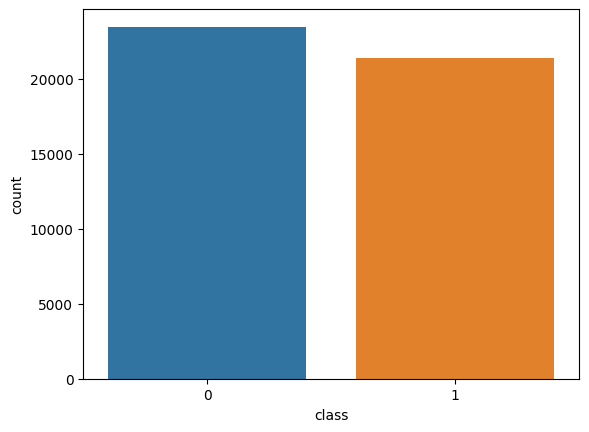

In [ ]:
#creates a barplot
sns.countplot(x = "class", data =df)

In [ ]:
#checks for null values
df.isnull().sum()

title    0
text     0
class    0
dtype: int64

In [ ]:
df['text'] = df['title'] + ' ' + df['text']

In [ ]:
#dropping columns
df= df.drop("title", axis = 1)
df= df.drop("date", axis = 1)

In [ ]:
df.head()

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,0


###**DATA PROCESSSING**

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

In [ ]:
#stop word removal
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
#imorting modules for Natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

In [ ]:
#tokenization
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [ ]:
#further data processing
filtered_df_1 = df[df['class'] == 1]
filtered_df_1["text"] = filtered_df_1["text"].apply(tokenize)
words = [word for words_list in filtered_df_1['text'] for word in words_list]
count = Counter(words)
top_n = 30
frequent_words = count.most_common(top_n)

###**DATA VISUALISATION**


<Axes: xlabel='count', ylabel='Word'>

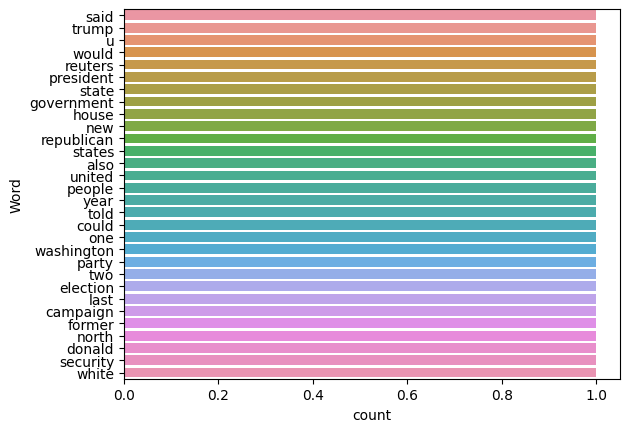

In [ ]:
word_df = pd.DataFrame(frequent_words, columns=['Word', 'Frequency'])
sns.countplot(y = "Word",data= word_df)

In [ ]:
filtered_df_0 = df[df['class'] == 0]
filtered_df_0["text"] = filtered_df_0["text"].apply(tokenize)
words = [word for words_list in filtered_df_0['text'] for word in words_list]
count = Counter(words)
top_n = 30
frequent_words = count.most_common(top_n)

<ipython-input-24-e814adacbfb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_0["text"] = filtered_df_0["text"].apply(tokenize)


<Axes: xlabel='count', ylabel='Word'>

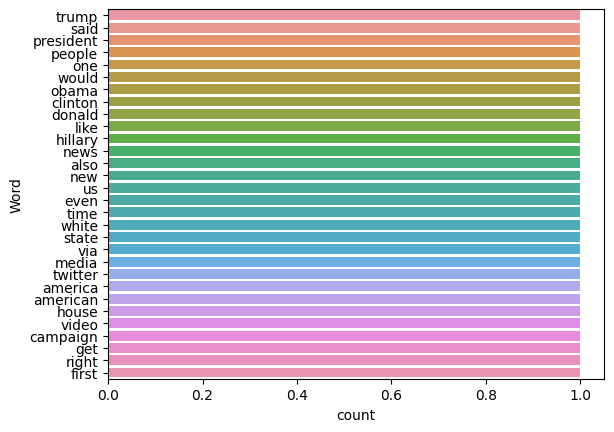

In [ ]:
word_df = pd.DataFrame(frequent_words, columns=['Word', 'Frequency'])
sns.countplot(y = "Word",data= word_df)

In [ ]:
df["text"]

0        donald trump sends embarrassing new year eve m...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obama name coded website i...
4        pope francis called donald trump christmas spe...
                               ...                        
21412    fully committed nato backs new u approach afgh...
21413    lexisnexis withdrew two products chinese marke...
21414    minsk cultural hub becomes authorities minsk r...
21415    vatican upbeat possibility pope francis visiti...
21416    indonesia buy billion worth russian jets jakar...
Name: text, Length: 44898, dtype: object

In [ ]:
X = df["text"]
y = df["class"]

In [ ]:
#Splitting the dataset
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
#coverting text data into numerical data
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [ ]:
print(xv_train.shape)
print(y_train.shape)

(33673, 95209)
(33673,)


### **TRAINING** **MODELS**

LOGISTIC REGRESSION

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
predict_lr = LR.predict(xv_test)
accuracy_LR = accuracy_score(predict_lr,y_test)

In [ ]:
accuracy_LR

0.9861024498886414

In [ ]:
print(classification_report(predict_lr,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5870
           1       0.99      0.98      0.99      5355

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



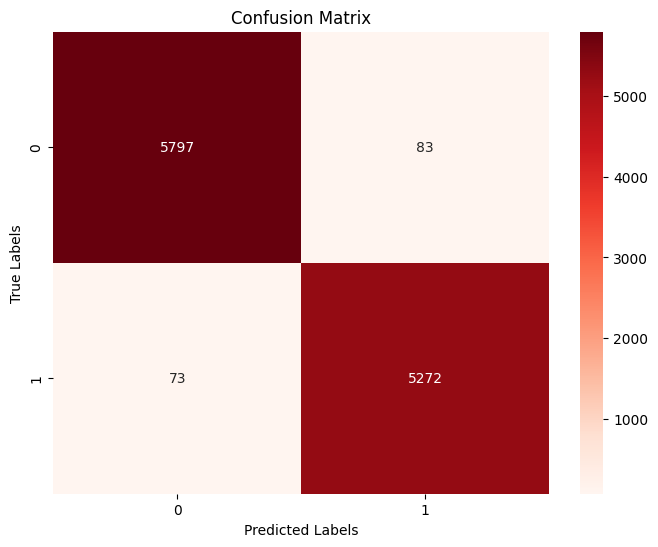

In [ ]:
#confusion matrix for testing data
cm_test = confusion_matrix(y_test, predict_lr)
pyt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Reds")
pyt.xlabel("Predicted Labels")
pyt.ylabel("True Labels")
pyt.title("Confusion Matrix")
pyt.show()

In [ ]:
pred_lr = LR.predict(xv_train)
acc_LR = accuracy_score(pred_lr,y_train)

In [ ]:
acc_LR

0.9924568645502331

In [ ]:
print(classification_report(pred_lr,y_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17551
           1       0.99      0.99      0.99     16122

    accuracy                           0.99     33673
   macro avg       0.99      0.99      0.99     33673
weighted avg       0.99      0.99      0.99     33673



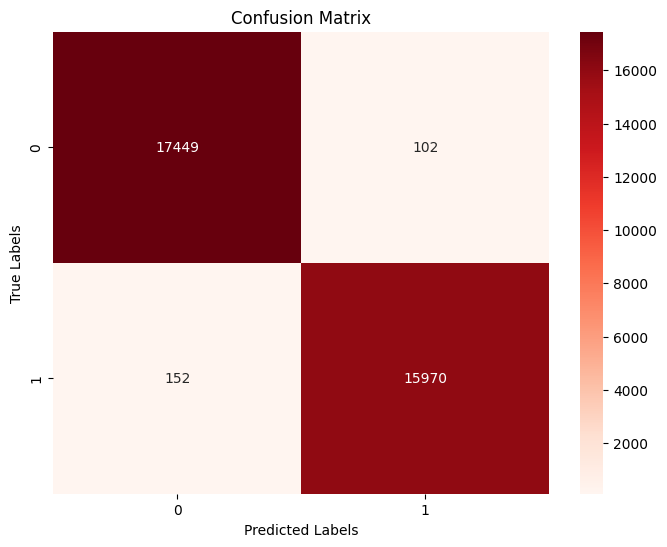

In [ ]:
#confusion matrix for training data
cm_train = confusion_matrix(pred_lr,y_train)
pyt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Reds")
pyt.xlabel("Predicted Labels")
pyt.ylabel("True Labels")
pyt.title("Confusion Matrix")
pyt.show()

DECISION TREE

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xv_train,y_train)

In [ ]:
predict_tree = clf.predict(xv_test)
accuracy_Tree = accuracy_score(predict_tree,y_test)

In [ ]:
accuracy_Tree

0.9948329621380846

In [ ]:
print(classification_report(predict_tree,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5880
           1       0.99      0.99      0.99      5345

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



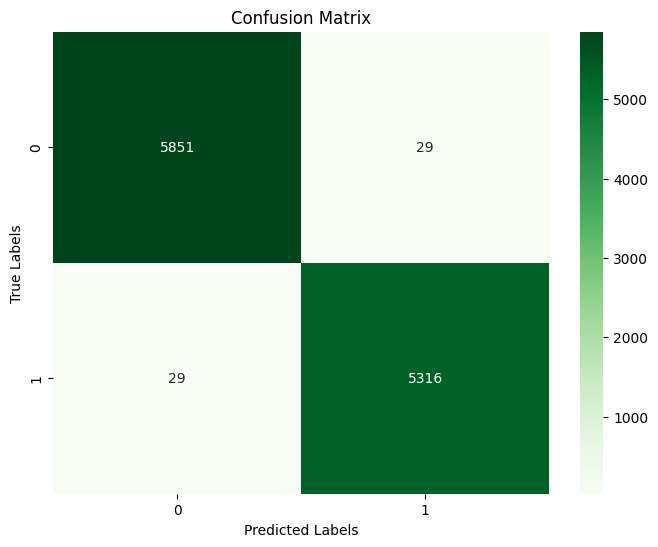

In [ ]:
#confusion matrix for testing data
cm_test = confusion_matrix(y_test, predict_tree)
pyt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
pyt.xlabel("Predicted Labels")
pyt.ylabel("True Labels")
pyt.title("Confusion Matrix")
pyt.show()


In [ ]:
pred_tree = clf.predict(xv_train)
acc_Tree = accuracy_score(pred_tree,y_train)

In [ ]:
acc_Tree

1.0

In [ ]:
print(classification_report(pred_tree,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17601
           1       1.00      1.00      1.00     16072

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673



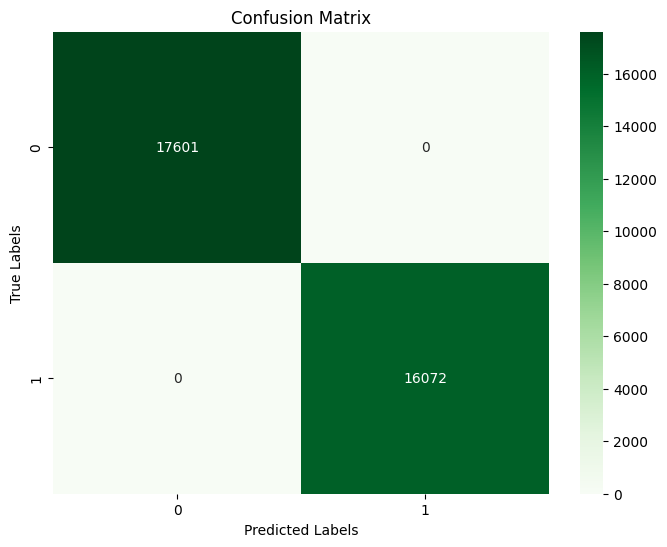

In [ ]:
#confusion matrix for training data
cm_train = confusion_matrix( pred_tree,y_train)
pyt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens")
pyt.xlabel("Predicted Labels")
pyt.ylabel("True Labels")
pyt.title("Confusion Matrix")
pyt.show()


SUPPORT VECTOR MACHINE

In [ ]:
svm = SVC()
svm = svm.fit(xv_train,y_train)

In [ ]:
predict_svm = svm.predict(xv_test)
accuracy_svm = accuracy_score(predict_svm,y_test)
accuracy_svm


0.9926057906458797

In [ ]:
print(classification_report(predict_svm,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5877
           1       0.99      0.99      0.99      5348

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



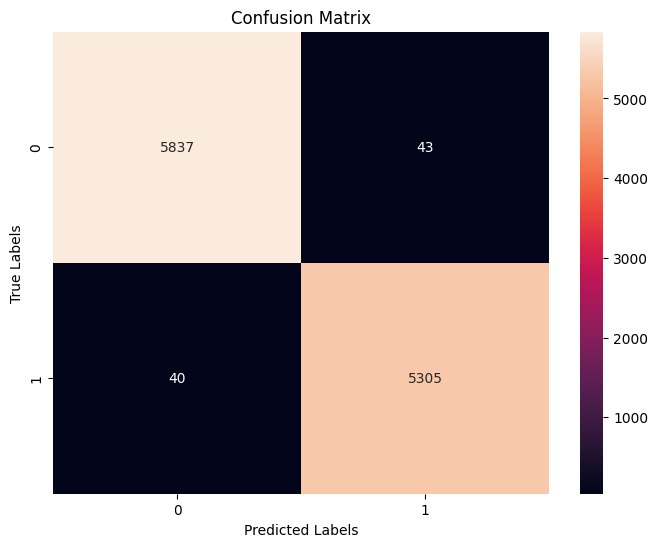

In [ ]:
#confusion matrix for testing data
cm_test = confusion_matrix(y_test, predict_svm)
pyt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d")
pyt.xlabel("Predicted Labels")
pyt.ylabel("True Labels")
pyt.title("Confusion Matrix")
pyt.show()

In [ ]:
pred_svm = svm.predict(xv_train)
acc_svm = accuracy_score(pred_svm,y_train)
acc_svm

0.999584236628753

In [ ]:
print(classification_report(pred_svm,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17595
           1       1.00      1.00      1.00     16078

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673



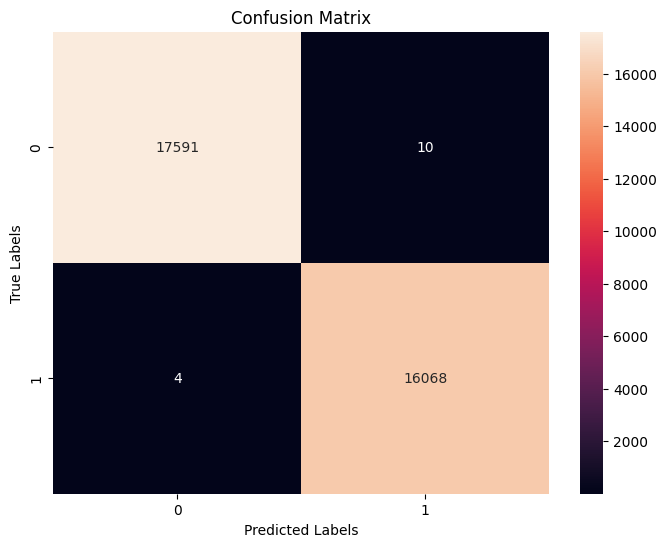

In [ ]:
#confusion matrix for training data
cm_train = confusion_matrix(y_train, pred_svm)
pyt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d")
pyt.xlabel("Predicted Labels")
pyt.ylabel("True Labels")
pyt.title("Confusion Matrix")
pyt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 15)
rfc.fit(xv_train, y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
predict_rfc = rfc.predict(xv_test)
accuracy_rfc = accuracy_score(predict_rfc,y_test)

In [ ]:
accuracy_rfc

0.9853006681514477

In [ ]:
print(classification_report(predict_rfc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5891
           1       0.98      0.99      0.98      5334

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



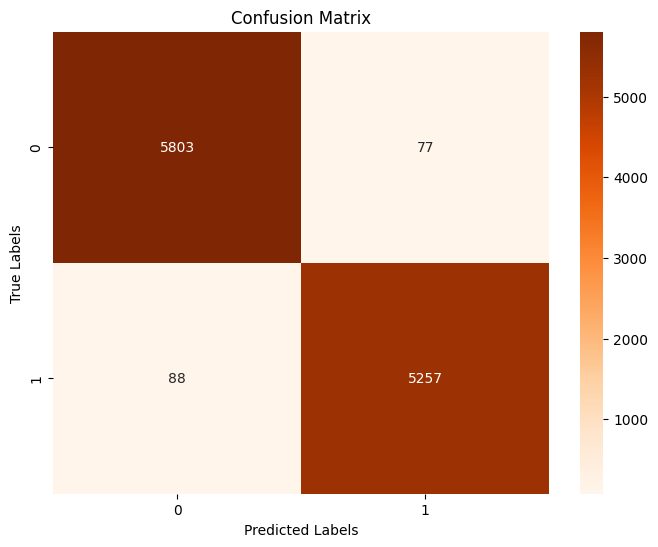

In [ ]:
#confusion matrix for testing data
cm_test = confusion_matrix(y_test, predict_rfc)

In [ ]:
pred_rfc = rfc.predict(xv_train)
acc_rfc = accuracy_score(pred_rfc,y_train)

In [ ]:
acc_rfc

0.9999703026163395

In [ ]:
print(classification_report(pred_rfc,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17602
           1       1.00      1.00      1.00     16071

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673



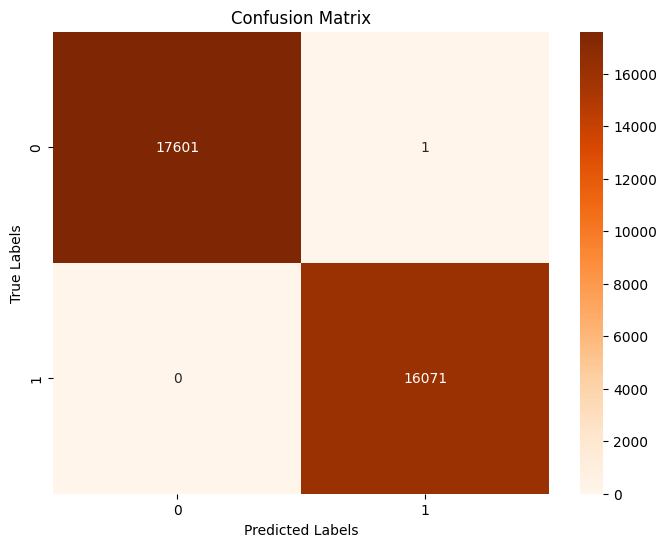

In [ ]:
#confusion matrix for testing data
cm_train = confusion_matrix(pred_rfc,y_train)
pyt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Oranges")
pyt.xlabel("Predicted Labels")
pyt.ylabel("True Labels")
pyt.title("Confusion Matrix")
pyt.show()

###**MANUAL TESTING**

In [ ]:
# Subset of the df for manual testing
test_subset = df.sample(4, random_state=45)

In [ ]:
test_subset

,title,text,class
10684,Online bettors see Donald Trump as odds-on Rep...,online bettors see donald trump odds republica...,1
3804,WATCH: Violent Trump Fan Shoves Peaceful Prot...,watch violent trump fan shoves peaceful protes...,0
15924,ILLEGAL ALIENS Jump Over Border Fence as MSNBC...,illegal aliens jump border fence msnbc reports...,0
5700,Lockheed says didn't seek help from Trump's ex...,lockheed says seek help trump ex campaign mana...,1


In [ ]:
# Manual Testing

for index, row in test_subset.iterrows():
    text = row['text']
    true_label = row['class']

    # Make prediction for the manually selected test sample
    text_tfidf = vectorization.transform([text])
    predicted_label = LR.predict(text_tfidf)[0]

    if predicted_label == 1:
        prediction = "True"
    else:
        prediction = "Fake"

    print(f"News: {text}")
    print(f"True Label: {'True' if true_label == 1 else 'Fake'}")
    print(f"Predicted Label: {prediction}")
    print("---------")

News: online bettors see donald trump odds republican nominee new york london reuters donald trump chances winning republican nomination white house shot record high online betting sites around world wednesday latest victory voting nevada betting venues britain ireland new zealand show online wagering community coalescing around trump considered rank outsider attracting long shot odds following double digit margin win nevada republican caucuses tuesday third victory first four early nominating contests odds tightened way cases mr trump triumphed yet despite political analysts almost unanimously writing serious presidential contender said graham sharpe william hill adding one customer stood collect least trump elected white house nov william hill betway make trump favorite get republican nod ladbrokes cut odds shown ireland paddypower nearest rival u senator marco rubio florida featured odds ladbrokes u senator ted cruz texas battling rubio spot early voting states sunk deep longshot pa